# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE. IT CAN BE DOWNLOADED FROM THE PREVIOUS LECTURE. PLEASE WATCH THE VIDEO LECTURE ON HOW TO GET THE DATA.

## USE OUR VERSION OF THE DATA. WE ALREADY ORGANIZED IT FOR YOU!!

--------
----------
--------

ORIGINAL DATA SOURCE:

https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

-----------

The Kaggle Competition: [Cats and Dogs](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition) includes 25,000 images of cats and dogs. We will be building a classifier that works with these images and attempt to detect dogs versus cats!

The pictures are numbered 0-12499 for both cats and dogs, thus we have 12,500 images of Dogs and 12,500 images of Cats. This is a huge dataset!!

--------
----------
------------


**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [1]:
#import matplotlib.pyplot as plt
import cv2


## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [4]:
image_gen.flow_from_directory('E:/NU/fall 22/Grad project/datasets/TRAIN')

Found 46469 images belonging to 2 classes.


In [5]:
image_gen.flow_from_directory('E:/NU/fall 22/Grad project/datasets/TEST')

Found 18700 images belonging to 2 classes.


### Resizing Images

Let's have Keras resize all the images to 150 pixels by 150 pixels once they've been manipulated.

In [6]:
# width,height,channels
image_shape = (150,150,3)

# Creating the Model

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

### Training the Model

In [11]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('E:/NU/fall 22/Grad project/datasets/TRAIN',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 46469 images belonging to 2 classes.


In [12]:
test_image_gen = image_gen.flow_from_directory('E:/NU/fall 22/Grad project/datasets/TEST',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18700 images belonging to 2 classes.


In [13]:
train_image_gen.class_indices

{'MYDATASET AUTHENTIC - Copy TRAINING': 0,
 'MYDATASET TAMPERED - Copy TRAINING': 1}

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 54s 354ms/step - loss: 0.5281 - accuracy: 0.7421 - val_loss: 0.7511 - val_accuracy: 0.6719
Epoch 2/100
150/150 [==============================] - 50s 331ms/step - loss: 0.3862 - accuracy: 0.8329 - val_loss: 0.4726 - val_accuracy: 0.7604
Epoch 3/100
150/150 [==============================] - 54s 357ms/step - loss: 0.3486 - accuracy: 0.8446 - val_loss: 0.4833 - val_accuracy: 0.7604
Epoch 4/100
150/150 [==============================] - 50s 336ms/step - loss: 0.3418 - accuracy: 0.8550 - val_loss: 0.4079 - val_accuracy: 0.7917
Epoch 5/100
150/150 [==============================] - 56s 372ms/step - loss: 0.3545 - accuracy: 0.8450 - val_loss: 0.4843 - val_accuracy: 0.7135
Epoch 6/100
150/150 [==============================] - 52s 349ms/step - loss: 0.3057 - accuracy: 0.8700 - val_loss: 0.3604 - val_accuracy: 0.8177
Epoch 7/100
150/150 [==============================] - 52s 344ms/step - loss: 0.2769 - accuracy: 0.8750 - val_loss: 0.3973 -

In [16]:
model.save('CNN_Image.h5')

# Evaluating the Model

In [20]:
results.history['accuracy']

[0.7420833110809326,
 0.8329166769981384,
 0.8445833325386047,
 0.8550000190734863,
 0.8450000286102295,
 0.8700000047683716,
 0.875,
 0.8700000047683716,
 0.871666669845581,
 0.878333330154419,
 0.8725000023841858,
 0.8704166412353516,
 0.8758333325386047,
 0.8808333277702332,
 0.8762500286102295,
 0.8929166793823242,
 0.8858333230018616,
 0.8849999904632568,
 0.8916666507720947,
 0.8912500143051147,
 0.892842173576355,
 0.8920833468437195,
 0.9004166722297668,
 0.8962500095367432,
 0.9020833373069763,
 0.8949999809265137,
 0.8979166746139526,
 0.9166666865348816,
 0.9083333611488342,
 0.9045833349227905,
 0.8958333134651184,
 0.903333306312561,
 0.9016666412353516,
 0.902916669845581,
 0.8766666650772095,
 0.8883333206176758,
 0.9108333587646484,
 0.8949999809265137,
 0.9100000262260437,
 0.9012500047683716,
 0.8983333110809326,
 0.8933333158493042,
 0.9100000262260437,
 0.893750011920929,
 0.8966666460037231,
 0.902916669845581,
 0.9141666889190674,
 0.902916669845581,
 0.8912500143

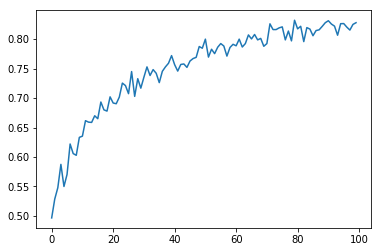

In [27]:
plt.plot(results.history['acc'])

In [18]:
model.save('CNN_Image_100epochs.h5')

# Predicting on new images

In [19]:
train_image_gen.class_indices

{'MYDATASET AUTHENTIC - Copy TRAINING': 0,
 'MYDATASET TAMPERED - Copy TRAINING': 1}

In [26]:
#import keras.utils as image

In [32]:
import numpy as np
import tensorflow as tf
#from keras.preprocessing import image

file = 'E:/NU/fall 22/Grad project/images/00007tamp4.jpg'

img = tf.keras.utils.load_img(file, target_size=(150, 150))

img = tf.keras.utils.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [33]:
prediction_prob = model.predict(img)

1/1 [==============================] - 0s 16ms/step


In [34]:
# Output prediction
print(f'Probability that image is a tampered is: {prediction_prob} ')

Probability that image is a tampered is: [[0.5534028]] 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.models.load_model('CNN_Image2.h5')

In [ ]:
from scipy import ndimage, misc
import os
import cv2

In [ ]:

path = "E:/NU/fall 22/Grad project/images authentic"
real_label = []
predicted = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):

    # create the full input path and read the file
    input_path = os.path.join(path, image_path)
    image= cv2.imread(input_path)
    if image is None:
        print('Wrong path:', input_path)
    else:
        img = cv2.resize(image, (512,512))
        img = tf.keras.utils.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img/255
        prediction_prob = model.predict(img)
        real_label.append(0)
        if prediction_prob < 0.5:
            predicted.append(0)
        else:
            predicted.append(1)
        print(f'Probability that image is a tampered is: {prediction_prob} ')

1/1 [==============================] - 0s 133ms/step
Probability that image is a tampered is: [[0.42591536]] 
1/1 [==============================] - 0s 106ms/step
Probability that image is a tampered is: [[0.44839832]] 
1/1 [==============================] - 0s 105ms/step
Probability that image is a tampered is: [[0.45910746]] 
1/1 [==============================] - 0s 110ms/step
Probability that image is a tampered is: [[0.5430195]] 
1/1 [==============================] - 0s 106ms/step
Probability that image is a tampered is: [[0.6463366]] 
1/1 [==============================] - 0s 102ms/step
Probability that image is a tampered is: [[0.4222735]] 
1/1 [==============================] - 0s 102ms/step
Probability that image is a tampered is: [[0.24627315]] 
1/1 [==============================] - 0s 103ms/step
Probability that image is a tampered is: [[0.3996654]] 
1/1 [==============================] - 0s 114ms/step
Probability that image is a tampered is: [[0.8826029]] 
1/1 [==========

In [ ]:

path = "E:/NU/fall 22/Grad project/images tampered"
real_label2 = []
predicted2 = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):

    # create the full input path and read the file
    input_path = os.path.join(path, image_path)
    image= cv2.imread(input_path)
    if image is None:
        print('Wrong path:', input_path)
    else:
        img = cv2.resize(image, (512,512))
        img = tf.keras.utils.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img/255
        prediction_prob = model.predict(img)
        real_label2.append(1)
        if prediction_prob > 0.5:
            predicted2.append(1)
        else:
            predicted2.append(0)
        print(f'Probability that image is a tampered is: {prediction_prob} ')

1/1 [==============================] - 0s 110ms/step
Probability that image is a tampered is: [[0.7411762]] 
1/1 [==============================] - 0s 119ms/step
Probability that image is a tampered is: [[0.73913693]] 
1/1 [==============================] - 0s 127ms/step
Probability that image is a tampered is: [[0.7430946]] 
1/1 [==============================] - 0s 113ms/step
Probability that image is a tampered is: [[0.7426874]] 
1/1 [==============================] - 0s 115ms/step
Probability that image is a tampered is: [[0.74018484]] 
1/1 [==============================] - 0s 113ms/step
Probability that image is a tampered is: [[0.7315102]] 
1/1 [==============================] - 0s 124ms/step
Probability that image is a tampered is: [[0.74713755]] 
1/1 [==============================] - 0s 131ms/step
Probability that image is a tampered is: [[0.74747396]] 
1/1 [==============================] - 0s 113ms/step
Probability that image is a tampered is: [[0.74514407]] 
1/1 [=========

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.util import view_as_windows

In [ ]:
print(accuracy_score(real_label,predicted))
print(confusion_matrix(real_label,predicted))
print(classification_report(real_label,predicted))

0.7006125574272588
[[915 391]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      1306
           1       0.00      0.00      0.00         0

    accuracy                           0.70      1306
   macro avg       0.50      0.35      0.41      1306
weighted avg       1.00      0.70      0.82      1306



In [ ]:
print(accuracy_score(real_label2,predicted2))
print(confusion_matrix(real_label2,predicted2))
print(classification_report(real_label2,predicted2))

0.4970954356846473
[[  0   0]
 [606 599]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.66      1205

    accuracy                           0.50      1205
   macro avg       0.50      0.25      0.33      1205
weighted avg       1.00      0.50      0.66      1205



In [ ]:
real_label_comp = real_label + real_label2

In [ ]:
predicted_comp = predicted + predicted2

In [ ]:
print(accuracy_score(real_label_comp,predicted_comp))
print(confusion_matrix(real_label_comp,predicted_comp))
print(classification_report(real_label_comp,predicted_comp))

0.60294703305456
[[915 391]
 [606 599]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      1306
           1       0.61      0.50      0.55      1205

    accuracy                           0.60      2511
   macro avg       0.60      0.60      0.60      2511
weighted avg       0.60      0.60      0.60      2511



# Great Job!